#Import library

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#Przygotowanie danych

In [2]:
os.getcwd()

from google.colab import drive
drive.mount("/content/drive")

os.chdir("/content/drive/MyDrive/Colab Notebooks/datasets/")

Mounted at /content/drive


#Zadanie 1

In [11]:
data_dsp_6 = pd.read_csv("DSP_6.csv")

pd.isnull(data_dsp_6).sum()

# lub (gorszy moim zdaniem)
# porownujemy ten wynik z total number of columns
# data_dsp_6.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Wyswietlenie zbioru (dla podgladu)


In [12]:
data_dsp_6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Zadanie 2

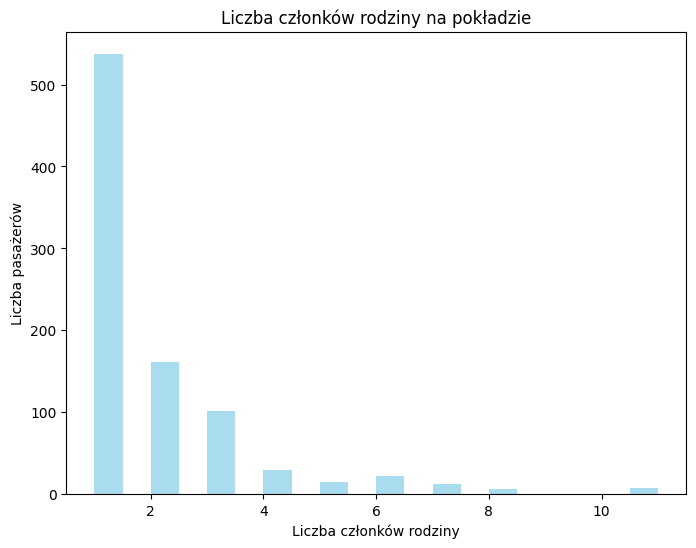

In [21]:
plt.figure(figsize=(8, 6))
data_dsp_6['Family_members'] = data_dsp_6['SibSp'] + data_dsp_6['Parch'] + 1
data_dsp_6['Family_members'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title('Liczba członków rodziny na pokładzie')
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczba pasażerów')
#plt.xticks(range(0, max(data_dsp_6['Family_members'])+1, 1)) #zeby byl co jeden na osi x
plt.grid(False)
plt.show()

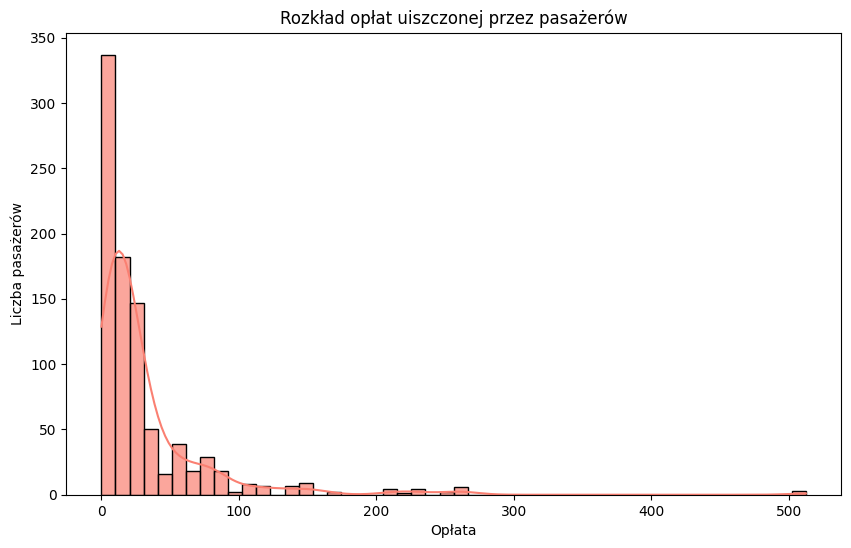

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data_dsp_6['Fare'], bins=50, kde=True, color='salmon', alpha=0.7)
plt.title('Rozkład opłat uiszczonej przez pasażerów')
plt.xlabel('Opłata')
plt.ylabel('Liczba pasażerów')
plt.show()

#Zadanie 3

In [24]:
data_to_train = pd.read_csv('DSP_6.csv')

# Przygotowanie danych
data_to_train.drop(columns=["Cabin"], inplace=True)
data_to_train.fillna(data_to_train.mean(numeric_only=True), inplace=True)
data_to_train.dropna(inplace=True)

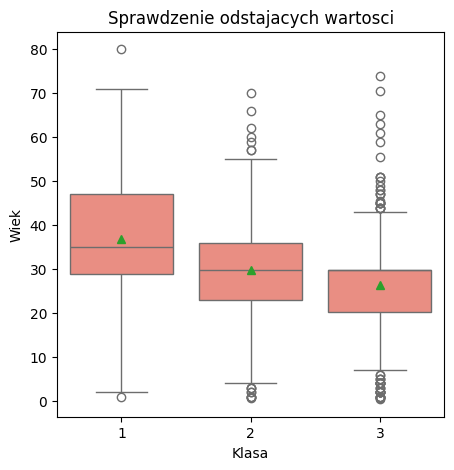

In [40]:
# Sprawdzenie odstajacych wartosci przed usunieciem ich
plt.figure(figsize=(5,5))
sns.boxplot(x="Pclass", y="Age", data=data_train_bad, showmeans=True, color='salmon')
plt.title('Sprawdzenie odstajacych wartosci')
plt.xlabel('Klasa')
plt.ylabel('Wiek')
plt.show()

In [60]:
# Podzial na klasy poniewaz sa 3
data_train_class1 = data_to_train.query('Pclass == 1').reset_index(drop=True)
data_train_class2 = data_to_train.query('Pclass == 2').reset_index(drop=True)
data_train_class3 = data_to_train.query('Pclass == 3').reset_index(drop=True)

#print(data_train_class1)
#print(data_train_class2)
#print(data_train_class3)

In [61]:
# Usuniecie przypadkow odstajacych
feature = 'Age'

# Klasa 1
Q1 = data_train_class1[feature].quantile(0.25)
Q3 = data_train_class1[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_train_class1_no_outliers = data_train_class1[(data_train_class1[feature] >= lower_bound) & (data_train_class1[feature] <= upper_bound)]

# Klasa 2
Q1 = data_train_class2[feature].quantile(0.25)
Q3 = data_train_class2[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_train_class2_no_outliers = data_train_class2[(data_train_class2[feature] >= lower_bound) & (data_train_class2[feature] <= upper_bound)]

# Klasa 3
Q1 = data_train_class3[feature].quantile(0.25)
Q3 = data_train_class3[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_train_class3_no_outliers = data_train_class3[(data_train_class3[feature] >= lower_bound) & (data_train_class3[feature] <= upper_bound)]


data_train_no_outliers = pd.concat([data_train_class1_no_outliers, data_train_class2_no_outliers, data_train_class3_no_outliers]).reset_index()

# Podzielenie na dwa zbiory
data_train_good = data_train_no_outliers
data_train_bad = data_train_no_outliers

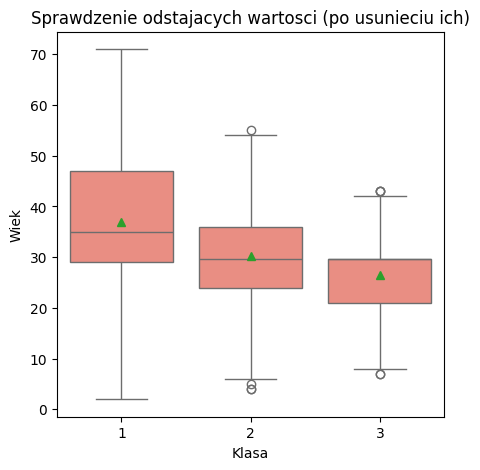

In [62]:
# Sprawdzenie odstajacych wartosci po usunieciu
plt.figure(figsize=(5,5))
sns.boxplot(x="Pclass", y="Age", data=data_train_bad, showmeans=True, color='salmon')
plt.title('Sprawdzenie odstajacych wartosci (po usunieciu ich)')
plt.xlabel('Klasa')
plt.ylabel('Wiek')
plt.show()

In [63]:
# trenowanie modelu bez konwersji danych
X = data_train_bad.drop(["Survived"], axis=1)
y = data_train_bad["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

ValueError: could not convert string to float: 'Taussig, Miss. Ruth'

pokazal sie blad could not convert string to float: 'Taussig, Miss. Ruth' oznacza on ze sa tam dane tekstowe (string), z ktorymi algorytm sobie nie radzi wiec wywal blad konwersji ze nie moze stringu zmienic na zmiennoprzecinkowa liczbe

In [64]:
data_train_good.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
1,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
2,2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
3,3,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
4,4,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [65]:
# transformacji zmiennych
sex = pd.get_dummies(data_train_good["Sex"], drop_first=True, dtype="int")
embark = pd.get_dummies(data_train_good["Embarked"], drop_first=True, dtype="int")
data_train_good_2 = pd.concat([data_train_good, sex, embark], axis=1)
data_train_good_2.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [67]:
# trenowanie po konwersji
X = data_train_good_2.drop(["Survived"], axis=1)
y = data_train_good_2["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.81      0.81      0.81        32

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



In [69]:
# trenowanie po konwersji (kilka iteracji)
X = data_train_good_2.drop(["Survived"], axis=1)
y = data_train_good_2["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

logmodel = LogisticRegression(max_iter=1001)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.81      0.81      0.81        32

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



In [70]:
# trenowanie po konwersji (kilka iteracji)
X = data_train_good_2.drop(["Survived"], axis=1)
y = data_train_good_2["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=6969)

logmodel = LogisticRegression(max_iter=1001)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        51
           1       0.82      0.74      0.78        31

    accuracy                           0.84        82
   macro avg       0.84      0.82      0.83        82
weighted avg       0.84      0.84      0.84        82



Po zmianie random_state z 101 na 6969, zmienily sie:
F1 score z 0.81 na 0.78 dla wartosci jeden
Precision 0.88 na 0.85 wartosc 0, 0.81 na 0.82 wartosc 1
recall 0.88 na 0.90 dla 0 i dla 1 0.81 na 0.74 dla 1
i kilka innych rzeczy. Czyli odpowiadajac na pytanie tak cos sie zmienia w modelu :)

#Zadanie 4

In [74]:
data_dsp_2 = pd.read_csv("DSP_2.csv")

# sprawdzenie czy sa dane puste
data_dsp_2.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [76]:
# podglad na dane
data_dsp_2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='Sex', ylabel='count'>

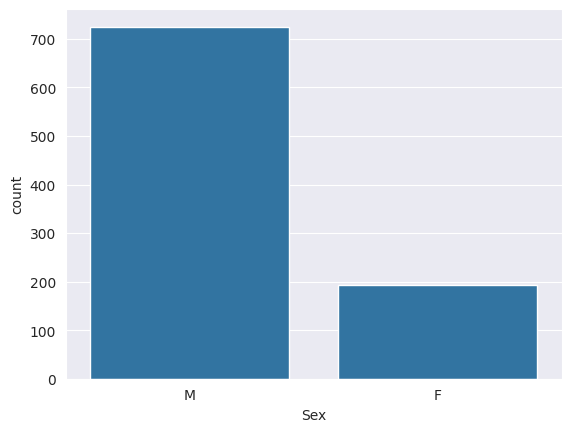

In [79]:
sns.set_style("darkgrid")
sns.countplot(x="Sex", data=data_dsp_2)

# malo danych kobiet jest w tym zbioze, moze powodowac to bledy lub nieprecyzyjnosc dla kobiet

<Axes: xlabel='HeartDisease', ylabel='count'>

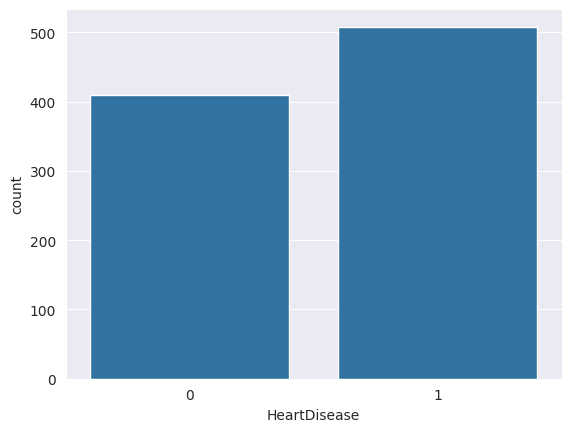

In [80]:
sns.set_style("darkgrid")
sns.countplot(x="HeartDisease", data=data_dsp_2)

# wyglada ok

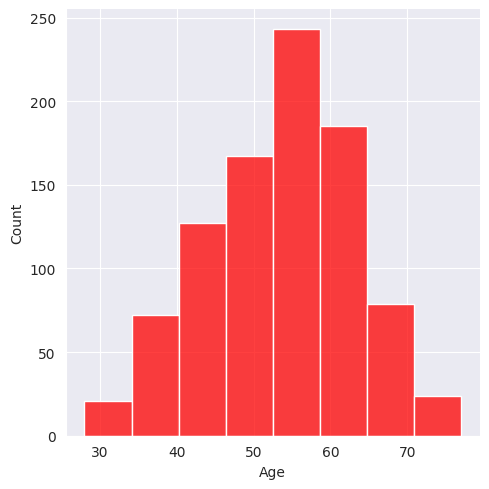

In [81]:
sns.displot(data_dsp_2["Age"], kde=False, color="red", bins=8)

# model bedzie najbarzdiej precyzyjnmy dla ludzi w srednim wieku, poniewaz jest znaczna mniejsza ilosc danych o mlodych jak i starych ludziach w zbiorze

In [82]:
# Preparing
chestpaintype = pd.get_dummies(data_dsp_2["ChestPainType"], drop_first=True, dtype="int")
stslope = pd.get_dummies(data_dsp_2["ST_Slope"], drop_first=True, dtype="int")
exerciseangina = pd.get_dummies(data_dsp_2["ExerciseAngina"], drop_first=True, dtype="int")
sex = pd.get_dummies(data_dsp_2["Sex"], drop_first=True, dtype="int")
restingecg = pd.get_dummies(data_dsp_2["RestingECG"], drop_first=True, dtype="int")

data_to_train_dsp_2 = pd.concat([data_dsp_2, sex, chestpaintype, restingecg, exerciseangina, stslope], axis=1)
data_to_train_dsp_2.drop(["ChestPainType", "Sex", "ST_Slope", "ExerciseAngina", "RestingECG"], axis=1, inplace=True)

In [86]:
# traning model
X=data_to_train_dsp_2.drop(["HeartDisease"], axis=1)
y=data_to_train_dsp_2["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
logmodel = LogisticRegression(max_iter=1001)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))

# podsumowanie, tak model cechuje sie dobrymi parametrami (wysokie F1),
# poniewaz ma bardzo dobre dane (dla ludzi w srednim wieku)
# Jesli chodzi czy moze zostac wykorzystany w praktyce tutaj zalezy:
# jezeli byl by przypadek ze dla osob w srednim wieku jest to tylko potrzebne to tak,
# ale jak mamy patrzec na ogol to mysle ze wymagaloby dodania danych dla osob mlodych i starych

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        51

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92

